In [ ]:
# stabilityai/stable-video-diffusion-img2vid-xt-1-1

Salesforce/blip-image-captioning-large

# A

In [1]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "playgroundai/playground-v2-1024px-aesthetic",
    torch_dtype=torch.float16,
    use_safetensors=True,
    add_watermarker=False,
    variant="fp16"
)

pipe.enable_sequential_cpu_offload()

prompt = "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k"
image  = pipe(prompt=prompt, guidance_scale=3.0)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

C:\Users\rajab\miniconda3\envs\py3_120\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/50 [00:00<?, ?it/s]

In [5]:
image.images[0].save(r"outputs\playgroundai\playground-astronaut2.png")

  0%|          | 0/50 [00:00<?, ?it/s]

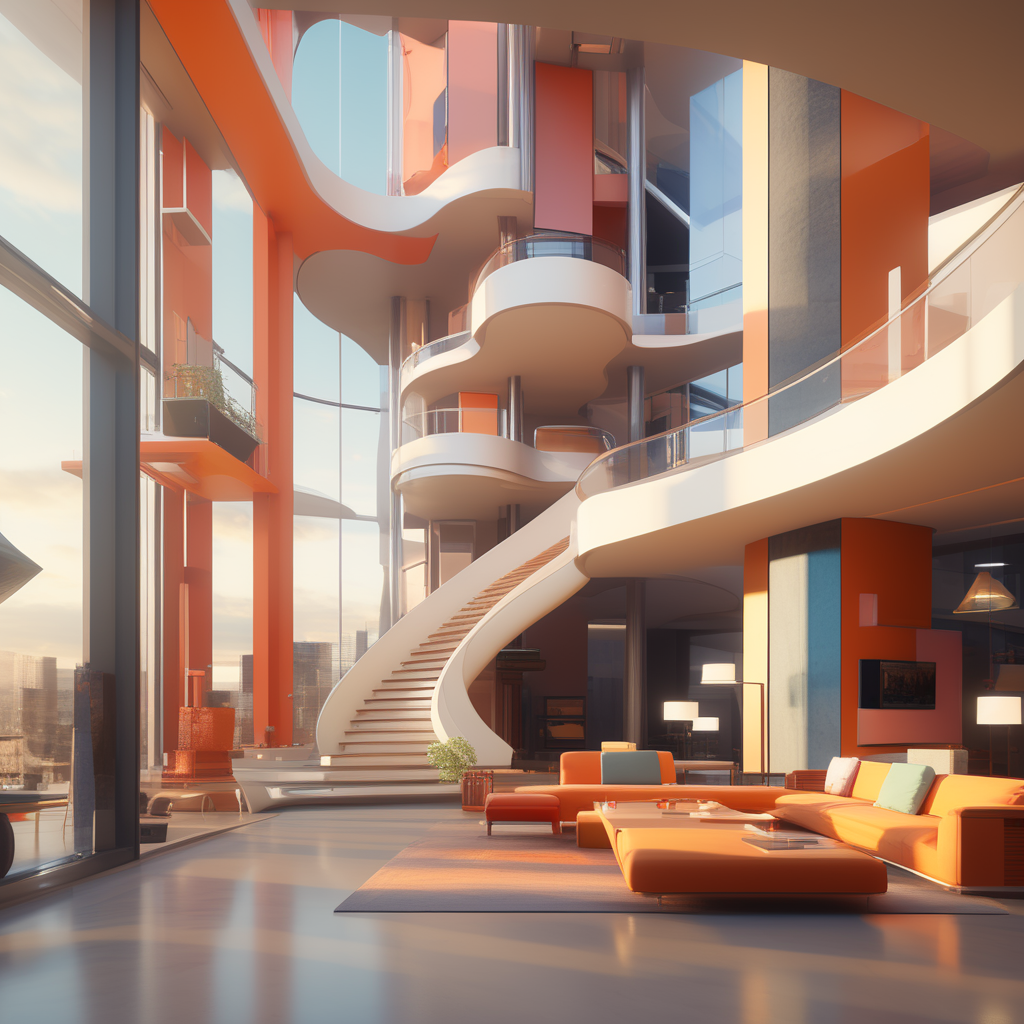

In [7]:
prompt = "portrait of abstraction architects, 8k"
image  = pipe(prompt=prompt, guidance_scale=3.0).images[0]
image.save(r"outputs\playgroundai\abstraction-architects1.png")
image

In [ ]:
prompts = [
    "Astronaut in a jungle, cold color palette, muted colors, detailed, 8k",
    "portrait of abstraction architects",
    "A panda, dressed in a small, red jacket and a tiny hat, sits on a wooden stool in a serene bamboo forest. The panda's fluffy paws strum a miniature acoustic guitar, producing soft, melodic tunes. Nearby, a few other pandas gather, watching curiously and some clapping in rhythm. Sunlight filters through the tall bamboo, casting a gentle glow on the scene. The panda's face is expressive, showing concentration and joy as it plays. The background includes a small, flowing stream and vibrant green foliage, enhancing the peaceful and magical atmosphere of this unique musical performance."
]

# B

In [1]:
import torch
from diffusers import CogVideoXPipeline
from diffusers.utils import export_to_video

prompt = "A panda, dressed in a small, red jacket and a tiny hat, sits on a wooden stool in a serene bamboo forest. The panda's fluffy paws strum a miniature acoustic guitar, producing soft, melodic tunes. Nearby, a few other pandas gather, watching curiously and some clapping in rhythm. Sunlight filters through the tall bamboo, casting a gentle glow on the scene. The panda's face is expressive, showing concentration and joy as it plays. The background includes a small, flowing stream and vibrant green foliage, enhancing the peaceful and magical atmosphere of this unique musical performance."

pipe = CogVideoXPipeline.from_pretrained(
    "THUDM/CogVideoX-2b",
    torch_dtype=torch.float16
)

pipe.enable_model_cpu_offload()
pipe.enable_sequential_cpu_offload()
# pipe.vae.enable_slicing()
# pipe.vae.enable_tiling()
video = pipe(
    prompt=prompt,
    num_videos_per_prompt=1,
    num_inference_steps=50,
    num_frames=48,
    guidance_scale=6,
    generator=torch.Generator(device="cuda").manual_seed(42),
).frames[0]

export_to_video(video, "output.mp4", fps=8)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The config attributes {'sample_height': 480, 'sample_width': 720} were passed to AutoencoderKLCogVideoX, but are not expected and will be ignored. Please verify your config.json configuration file.
The config attributes {'use_rotary_positional_embeddings': False} were passed to CogVideoXTransformer3DModel, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\rajab\miniconda3\envs\py3_120\Lib\site-packages\diffusers\models\attention_processor.py:2216: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  hidden_states = F.scaled_dot_product_attention(


'output.mp4'

# C

In [1]:
from diffusers import StableVideoDiffusionPipeline
import torch
from PIL import Image

# Load the pipeline
pipe = StableVideoDiffusionPipeline.from_pretrained(
    r"C:\Users\rajab\Desktop\stuffs\TimeLine\2024\09_Sep\stable-video-diffusion-img2vid-xt-1-1", 
    torch_dtype=torch.float16, 
    variant="fp16"
)
pipe.enable_model_cpu_offload()
pipe.enable_sequential_cpu_offload()

# Load and preprocess the input image
input_image = Image.open(r"C:\Users\rajab\Desktop\cloud\cloud\timeline\2024\09_Sep\modelsForQuantization\outputs\playgroundai\playground-astronaut1.png"
                        ).convert("RGB")

# Generate the video frames
frames = pipe(input_image, num_frames=14, num_inference_steps=20).frames[0]

# You can now save these frames as a video or process them further

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\rajab\miniconda3\envs\py3_120\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


  0%|          | 0/20 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 1.97 GiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 13.81 GiB is allocated by PyTorch, and 33.54 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [7]:
pipe.enable_model_cpu_offload()
pipe.enable_sequential_cpu_offload()

# Load and preprocess the input image
input_image = Image.open(r"C:\Users\rajab\Desktop\cloud\cloud\timeline\2024\09_Sep\modelsForQuantization\outputs\playgroundai\playground-astronaut1.png"
                        ).convert("RGB")

# Generate the video frames
frames = pipe(input_image, num_frames=14, num_inference_steps=20).frames[0]

AttributeError: 'torch.dtype' object has no attribute 'to'

In [ ]:
# from diffusers.utils import export_to_video
# export_to_video(frames, "astranaut.mp4", fps=8)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def display_video(frames, fps=7):
    plt.figure(figsize=(frames[0].size[0]/72.0, frames[0].size[1]/72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
    
    anim = FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=1000/fps)
    return HTML(anim.to_jshtml())

# Assuming 'frames' is the list of PIL Image objects from the previous code
video = display_video(frames)
video

In [1]:
from diffusers import StableVideoDiffusionPipeline
import torch
from PIL import Image

# Load the pipeline
pipe = StableVideoDiffusionPipeline.from_pretrained(
    r"C:\Users\rajab\Desktop\stuffs\TimeLine\2024\09_Sep\stable-video-diffusion-img2vid-xt-1-1", 
    torch_dtype=torch.float16, 
    variant="fp16"
)
# device = "cuda" if torch.cuda.is_available() else "cpu"
# pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [1]:
from torch.ao.quantization import quantize_dynamic
import gc
from tqdm import tqdm
from diffusers import StableVideoDiffusionPipeline
import torch
from PIL import Image

# Load the pipeline
pipe = StableVideoDiffusionPipeline.from_pretrained(
    r"C:\Users\rajab\Desktop\stuffs\TimeLine\2024\09_Sep\stable-video-diffusion-img2vid-xt-1-1", 
    torch_dtype=torch.float16, 
    variant="fp16"
)


# pipe.to(torch.float32)

# # Save the modified pipeline
pipe.save_pretrained("./models/stable-video-diffusion-img2vid-xt-1-1")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
# pipe.to(torch.float32)
pipe.save_pretrained(".models/stable-video-diffusion-img2vid-xt-1-1")

AttributeError: 'torch.dtype' object has no attribute 'data_ptr'

In [4]:
from torch.ao.quantization import quantize_dynamic
quantize_dynamic(pipe.unet,inplace= True )

UNetSpatioTemporalConditionModel(
  (conv_in): Conv2d(8, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): DynamicQuantizedLinear(in_features=320, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (act): SiLU()
    (linear_2): DynamicQuantizedLinear(in_features=1280, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  )
  (add_time_proj): Timesteps()
  (add_embedding): TimestepEmbedding(
    (linear_1): DynamicQuantizedLinear(in_features=768, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
    (act): SiLU()
    (linear_2): DynamicQuantizedLinear(in_features=1280, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlockSpatioTemporal(
      (attentions): ModuleList(
        (0-1): 2 x TransformerSpatioTemporalModel(
          (norm): GroupNorm(32, 320, eps=1e

In [5]:
from torch.ao.quantization import quantize_dynamic
quantize_dynamic(pipe.image_encoder,inplace= True )

CLIPVisionModelWithProjection(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1280)
    )
    (pre_layrnorm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-31): 32 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): DynamicQuantizedLinear(in_features=1280, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
            (v_proj): DynamicQuantizedLinear(in_features=1280, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
            (q_proj): DynamicQuantizedLinear(in_features=1280, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor_affine)
            (out_proj): DynamicQuantizedLinear(in_features=1280, out_features=1280, dtype=torch.qint8, qscheme=torch.per_tensor

In [3]:
def get_all_modules_name(pipe):
    res = []
    for k in pipe.__dict__:
        if isinstance(getattr(pipe, k), torch.nn.modules.module.Module):
            res.append(k)
    return res
modules = get_all_modules_name(pipe)
modules

['vae', 'image_encoder', 'unet']

In [3]:
import torch
from diffusers import FluxPipeline
import torch
from torch.ao.quantization import quantize_dynamic
import gc
from transformers import BitsAndBytesConfig

class Quantizer:
    def __init__(self):
        self.type = None
        self.dtype = torch.qint8
        self.size_threshold_mb = 10
    def set_model_name(self, name):
        self.type = "model"
        self.model_name = name
    def set_pipeline(self, pipeline):
        self.type = "pipe"
        self.pipeline = pipeline
        self.modules = self.get_all_modules_name(pipeline)
    def quantize(self):
        if self.type == "pipe":
            for module in self.modules:
                print("quantizing", module)
                self.quantize_pipeline(getattr(self.pipeline, module))
        elif self.type == "model":
            self.quantize_model()
    def quantize_model(self,use_4bit=True, bnb_4bit_compute_dtype="float16", 
                       bnb_4bit_quant_type= "nf4", use_nested_quant=False ):
        compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

        bnb_config = BitsAndBytesConfig(
            load_in_4bit=use_4bit,
            bnb_4bit_quant_type=bnb_4bit_quant_type,
            bnb_4bit_compute_dtype=compute_dtype,
            bnb_4bit_use_double_quant=use_nested_quant,
        )
        
        # Check GPU compatibility with bfloat16
        if compute_dtype == torch.float16 and use_4bit:
            major, _ = torch.cuda.get_device_capability()
            if major >= 8:
                print("=" * 80)
                print("Your GPU supports bfloat16: accelerate training with bf16=True")
                print("=" * 80)
                
        self.model = AutoModelForCausalLM.from_pretrained(
            self.model_name,
            quantization_config=bnb_config,
        )
    def get_all_modules_name(self, pipe):
        res = []
        for k in pipe.__dict__:
            if isinstance(getattr(pipe, k), torch.nn.modules.module.Module):
                res.append(k)
        return res
    def get_model_size(self, model):
        param_size = 0
        for param in model.parameters():
            param_size += param.nelement() * param.element_size()
        buffer_size = 0
        for buffer in model.buffers():
            buffer_size += buffer.nelement() * buffer.element_size()
        size_all_mb = (param_size + buffer_size) / 1024**2
        return size_all_mb
    def quantize_module(self, module):
        return quantize_dynamic(
            module,
            {torch.nn.Linear},
            dtype=self.dtype
        )
    def quantize_pipeline(self, module, parent_name=''):
        quantized = False
        for name, submodule in module.named_children():
            full_name = f"{parent_name}.{name}" if parent_name else name
            size_mb = self.get_model_size(submodule)
            
            if self.size_threshold_mb is None or size_mb > self.size_threshold_mb:
                print(f"Quantizing {full_name} ({size_mb:.2f} MB)...")
                submodule = self.quantize_module(submodule)
                setattr(module, name, submodule)
                quantized = True
                gc.collect()
                torch.cuda.empty_cache()
            else:
                print(f"Skipping {full_name} ({size_mb:.2f} MB) - below threshold")
        return module
    def save(self, output_path):
        if self.type == "pipe":
            self.pipeline.save_pretrained(output_path)
        elif self.type == "model":
            self.model.save_pretrained(output_path)
        else:
            print("nothing to save")
class Main:
    def quantize_pipeline(pipe):
        q = Quantizer()
        q.set_pipeline(pipe)
        return q
    def quantize_model(model_name):
        q = Quantizer()
        q.set_model_name(model_name)
        return q


# D

In [36]:
from pathlib import Path

import torch
from PIL import Image

from refiners.fluxion.utils import image_to_tensor, no_grad, normalize, tensor_to_image
from refiners.foundationals.swin.mvanet import MVANet

BoundingBox = tuple[int, int, int, int]


class BoxSegmenter:
    def __init__(
        self,
        *,
        margin: float = 0.05,
        weights: Path | str | dict[str, torch.Tensor] | None = None,
        device: torch.device | str = "cpu",
    ):
        assert margin >= 0
        self.margin = margin

        self.device = torch.device(device)
        self.model = MVANet(device=self.device).eval()

        if weights is None:
            from huggingface_hub.file_download import hf_hub_download  # type: ignore[reportUnknownVariableType]

            weights = hf_hub_download(
                repo_id="finegrain/finegrain-box-segmenter",
                filename="model.safetensors",
                revision="v0.1",
            )

        if isinstance(weights, dict):
            self.model.load_state_dict(weights)
        else:
            self.model.load_from_safetensors(weights)

    def __call__(self, img: Image.Image, box_prompt: BoundingBox | None = None) -> Image.Image:
        return self.run(img, box_prompt)

    def add_margin(self, box: BoundingBox) -> BoundingBox:
        x0, y0, x1, y1 = box
        mx = int((x1 - x0) * self.margin)
        my = int((y1 - y0) * self.margin)
        return (x0 - mx, y0 - my, x1 + mx, y1 + my)

    @staticmethod
    def crop_pad(img: Image.Image, box: BoundingBox) -> Image.Image:
        img = img.convert("RGB")

        x0, y0, x1, y1 = box
        px0, py0, px1, py1 = (max(0, -x0), max(0, -y0), max(0, x1 - img.width), max(0, y1 - img.height))
        if (px0, py0, px1, py1) == (0, 0, 0, 0):
            return img.crop(box)

        padded = Image.new("RGB", (img.width + px0 + px1, img.height + py0 + py1))
        padded.paste(img, (px0, py0))
        return padded.crop((x0 + px0, y0 + py0, x1 + px0, y1 + py0))

    def predict(self, img: Image.Image) -> Image.Image:
        in_t = image_to_tensor(img.resize((1024, 1024), Image.Resampling.BILINEAR)).squeeze()
        in_t = normalize(in_t, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]).unsqueeze(0)
        with no_grad():
            prediction: torch.Tensor = self.model(in_t.to(self.device)).sigmoid()
        return tensor_to_image(prediction).resize(img.size, Image.Resampling.BILINEAR)

    def run(self, img: Image.Image, box_prompt: BoundingBox | None = None) -> Image.Image:
        if box_prompt is None:
            box_prompt = (0, 0, img.width, img.height)

        box = self.add_margin(box_prompt)
        cropped = self.crop_pad(img, box)
        prediction = self.predict(cropped)

        out = Image.new("L", (img.width, img.height))
        out.paste(prediction, box)
        return out

ModuleNotFoundError: No module named 'refiners.foundationals.swin'

In [34]:
from PIL import Image
from refiners.solutions import BoxSegmenter

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

# Downloads the weights from finegrain/finegrain-box-segmenter
segmenter = BoxSegmenter()
# box_prompt is (x_min, y_min, x_max, y_max)
mask = segmenter(image, box_prompt=(24, 133, 588, 531))
# Or without box_prompt as a background remover
# mask = segmenter(input_image.convert("RGB"))
mask.save("output.png")


ModuleNotFoundError: No module named 'refiners.solutions'

In [35]:
!start

# E

In [8]:
from PIL import Image, ImageDraw, ImageFont
import os

def draw_bounding_box(img, bboxes, labels, output_path=None):
    draw = ImageDraw.Draw(img)
    try:
        font = ImageFont.truetype("arial.ttf", 30)
    except IOError:
        font = ImageFont.load_default()
    
    for label, bbox in zip(labels, bboxes):
        draw.rectangle(bbox, outline="red", width=3)
        text_bbox = font.getbbox(label)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]
        text_position = (bbox[0], bbox[1] - text_height) 
        draw.rectangle([text_position, (text_position[0] + text_width, text_position[1] + text_height)], fill="red")
        draw.text(text_position, label, fill="white", font=font)

    if output_path is not None:
        img.save(output_path)
    return img


## Main code

In [9]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 

model_id = "IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
# Check for cats and remote controls
# VERY important: text queries need to be lowercased + end with a dot
text = "a cat. a remote control."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)


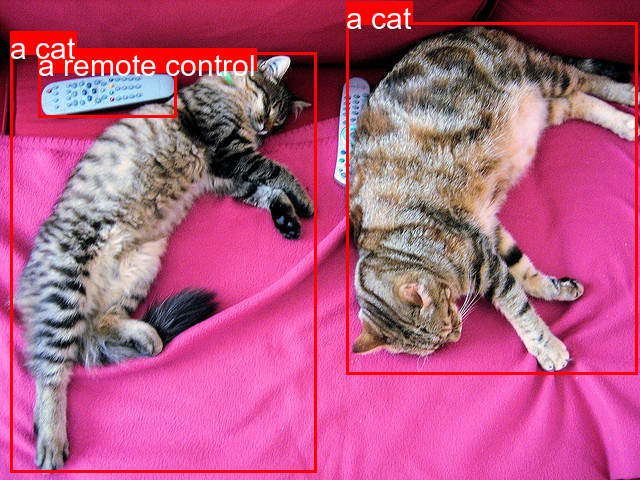

In [10]:
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
image
draw_bounding_box(image, results[0]["boxes"].tolist(), results[0]["labels"])

## Quantization

In [ ]:
# memory testing

In [5]:
for k,v in oldInps.items():
    print(type(v))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


### quantize and save

In [1]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 
from transformers import BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type= "nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=False,
)

model_id = "IDEA-Research/grounding-dino-base"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id, quantization_config=bnb_config)
from safetensors.torch import load_model, save_model

save_model(model, ".models/grounding-dino-base/model.safetensors")
processor.save_pretrained(".models/grounding-dino-base")

`low_cpu_mem_usage` was None, now set to True since model is quantized.
Some weights of GroundingDinoForObjectDetection were not initialized from the model checkpoint at IDEA-Research/grounding-dino-base and are newly initialized: ['bbox_embed.1.layers.0.bias', 'bbox_embed.1.layers.0.weight', 'bbox_embed.1.layers.1.bias', 'bbox_embed.1.layers.1.weight', 'bbox_embed.1.layers.2.bias', 'bbox_embed.1.layers.2.weight', 'bbox_embed.2.layers.0.bias', 'bbox_embed.2.layers.0.weight', 'bbox_embed.2.layers.1.bias', 'bbox_embed.2.layers.1.weight', 'bbox_embed.2.layers.2.bias', 'bbox_embed.2.layers.2.weight', 'bbox_embed.3.layers.0.bias', 'bbox_embed.3.layers.0.weight', 'bbox_embed.3.layers.1.bias', 'bbox_embed.3.layers.1.weight', 'bbox_embed.3.layers.2.bias', 'bbox_embed.3.layers.2.weight', 'bbox_embed.4.layers.0.bias', 'bbox_embed.4.layers.0.weight', 'bbox_embed.4.layers.1.bias', 'bbox_embed.4.layers.1.weight', 'bbox_embed.4.layers.2.bias', 'bbox_embed.4.layers.2.weight', 'bbox_embed.5.layers.0.b

### predict using quantized version

In [9]:
import requests

import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 

from safetensors.torch import load_model
processor = AutoProcessor.from_pretrained(".models/grounding-dino-base")
model = load_model(".models/grounding-dino-base/model.safetensors")


image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)
# Check for cats and remote controls
# VERY important: text queries need to be lowercased + end with a dot
text = "a cat. a remote control."

inputs = processor(images=image, text=text, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)

results = processor.post_process_grounded_object_detection(
    outputs,
    inputs.input_ids,
    box_threshold=0.4,
    text_threshold=0.3,
    target_sizes=[image.size[::-1]]
)


TypeError: load_model() missing 1 required positional argument: 'filename'

In [10]:
load_model

<function safetensors.torch.load_model(model: torch.nn.modules.module.Module, filename: Union[str, os.PathLike], strict: bool = True, device: Union[str, int] = 'cpu') -> Tuple[List[str], List[str]]>

# F

## Main code

In [3]:
# main code size is 1.7 gb

### full precision

In [4]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to("cuda")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

# unconditional image captioning
inputs = processor(raw_image, return_tensors="pt").to("cuda")

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


### half precision

In [7]:
import torch
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large", torch_dtype=torch.float16).to("cuda")

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

inputs = processor(raw_image, return_tensors="pt").to("cuda", torch.float16)

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


a photography of a woman and her dog on the beach
woman sitting on the beach with her dog and a cell phone


## Quantized version

In [9]:
# model size : 321 mb

### quantize and save

In [1]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
from transformers import BitsAndBytesConfig
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type= "nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=False,
)

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large", quantization_config=bnb_config)

model.save_pretrained(".models/blip-image-captioning-large")
processor.save_pretrained(".models/blip-image-captioning-large")

`low_cpu_mem_usage` was None, now set to True since model is quantized.


[]

### predict

In [12]:
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

# Check if CUDA is available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the processor and model
processor = BlipProcessor.from_pretrained(".models/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained(".models/blip-image-captioning-large")

# Note: We don't move the model to a specific device as it's already placed correctly

img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
inputs = processor(raw_image, text, return_tensors="pt").to(device)
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))


inputs = processor(raw_image, return_tensors="pt").to(device)
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now set to True since model is quantized.


Using device: cuda
a photography of a woman and her dog on the beach
there is a woman and a dog on the beach playing with each other


In [2]:
# raw_image

In [12]:
import torch
from diffusers import FluxPipeline
import torch
from torch.ao.quantization import quantize_dynamic
import gc
from transformers import BitsAndBytesConfig

class Quantizer:
    def __init__(self):
        self.type = None
        self.dtype = torch.qint8
        self.size_threshold_mb = 10
    def set_model_name(self, name):
        self.type = "model"
        self.model_name = name
    def set_pipeline(self, pipeline):
        self.type = "pipe"
        self.pipeline = pipeline
        self.modules = self.get_all_modules_name(pipeline)
    def quantize(self):
        if self.type == "pipe":
            for module in self.modules:
                print("quantizing", module)
                self.quantize_pipeline(getattr(self.pipeline, module))
        elif self.type == "model":
            self.quantize_model()
    def quantize_model(self,use_4bit=True, bnb_4bit_compute_dtype="float16", 
                       bnb_4bit_quant_type= "nf4", use_nested_quant=False ):
        compute_dtype = getattr(torch, bnb_4bit_compute_dtype)

        bnb_config = BitsAndBytesConfig(
            load_in_4bit=use_4bit,
            bnb_4bit_quant_type=bnb_4bit_quant_type,
            bnb_4bit_compute_dtype=compute_dtype,
            bnb_4bit_use_double_quant=use_nested_quant,
        )
        
        # Check GPU compatibility with bfloat16
        if compute_dtype == torch.float16 and use_4bit:
            major, _ = torch.cuda.get_device_capability()
            if major >= 8:
                print("=" * 80)
                print("Your GPU supports bfloat16: accelerate training with bf16=True")
                print("=" * 80)
                
        self.model = AutoModelForCausalLM.from_pretrained(
            self.model_name,
            quantization_config=bnb_config,
        )
    def get_all_modules_name(self, pipe):
        res = []
        for k in pipe.__dict__:
            if isinstance(getattr(pipe, k), torch.nn.modules.module.Module):
                res.append(k)
        return res
    def get_model_size(self, model):
        param_size = 0
        for param in model.parameters():
            param_size += param.nelement() * param.element_size()
        buffer_size = 0
        for buffer in model.buffers():
            buffer_size += buffer.nelement() * buffer.element_size()
        size_all_mb = (param_size + buffer_size) / 1024**2
        return size_all_mb
    def quantize_module(self, module):
        return quantize_dynamic(
            module,
            {torch.nn.Linear},
            dtype=self.dtype
        )
    def quantize_pipeline(self, module, parent_name=''):
        quantized = False
        for name, submodule in module.named_children():
            full_name = f"{parent_name}.{name}" if parent_name else name
            size_mb = self.get_model_size(submodule)
            
            if self.size_threshold_mb is None or size_mb > self.size_threshold_mb:
                print(f"Quantizing {full_name} ({size_mb:.2f} MB)...")
                if list(submodule.children()):  # If submodule has children
                    submodule = self.quantize_pipeline(submodule, full_name)
                else:
                    submodule = self.quantize_module(submodule)
                setattr(module, name, submodule)
                quantized = True
                gc.collect()
                torch.cuda.empty_cache()
            else:
                print(f"Skipping {full_name} ({size_mb:.2f} MB) - below threshold")
        return module
    def save(self, output_path):
        if self.type == "pipe":
            self.pipeline.save_pretrained(output_path)
        elif self.type == "model":
            self.model.save_pretrained(output_path)
        else:
            print("nothing to save")
class Main:
    def quantize_pipeline(pipe):
        q = Quantizer()
        q.set_pipeline(pipe)
        return q
    def quantize_model(model_name):
        q = Quantizer()
        q.set_model_name(model_name)
        return q


ImportError: cannot import name 'AutoModelForCausalLM' from 'diffusers' (C:\Users\rajab\miniconda3\envs\py3_120\Lib\site-packages\diffusers\__init__.py)

In [5]:
q = Quantizer()

In [6]:
q.set_model_name("Salesforce/blip-image-captioning-large")

In [11]:
q.quantize()

Your GPU supports bfloat16: accelerate training with bf16=True


NameError: name 'AutoModelForCausalLM' is not defined

In [14]:
from transformers import BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type= "nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=False,
)

In [ ]:
AutoModelForCausalLM.from_pretrained(
            self.model_name,
            quantization_config=bnb_config,
        )

In [ ]:
BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

# G

In [4]:
# Pipeline for Flux
from diffusionkit.mlx import FluxPipeline

pipeline = FluxPipeline(
  shift=1.0,
  model_version="argmaxinc/mlx-FLUX.1-schnell-4bit-quantized",
  low_memory_mode=True,
  a16=True,
  w16=True,
)

# Image Generation
HEIGHT = 512
WIDTH = 512
NUM_STEPS = 4
CFG_WEIGHT = 0

image, _ = pipeline.generate_image(
  "a photo of a cat",
  cfg_weight=CFG_WEIGHT,
  num_steps=NUM_STEPS,
  latent_size=(HEIGHT // 8, WIDTH // 8),
)

ModuleNotFoundError: No module named 'diffusionkit'

# stable diffusion image

In [1]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "benjamin-paine/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt).images[0]  
    
image.save("astronaut_rides_horse.png")


LocalEntryNotFoundError: An error happened while trying to locate the file on the Hub and we cannot find the requested files in the local cache. Please check your connection and try again or make sure your Internet connection is on.